# Exercise 3.4.3  

Hard: Forecast the daily closing price of a stock of your choice

The historical daily closing price of many stocks is available for free on finance.yahoo.com. Select a stock ticker of your choice and download its historical daily closing price of 1 year. 
 
1) Plot the daily closing price of your chosen stock
1) Determine if it is a random walk or not.
1) If it is not a random walk, explain why.
1) Keep the last 5 days of data as a test set. The rest will be the training set.
1) Forecast the last 5 days using naïve forecasting methods and measure the MSE.  Which method is the best?
1) Plot your forecasts
1) Forecast the next timestep over the test set and measure the MSE. Did it decrease?
1) Plot your forecasts  

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib
import sys
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../../My-Code/')

import timetools as tt

importlib.reload(tt)

<module 'timetools' from '../../My-Code/timetools.py'>

[*********************100%***********************]  1 of 1 completed


Date
2020-04-28     68.788498
2020-04-29     71.047874
2020-04-30     72.546707
2020-05-01     71.378754
2020-05-04     72.388672
                 ...    
2021-04-22    131.327560
2021-04-23    133.696503
2021-04-26    134.094650
2021-04-27    133.766190
2021-04-28    132.959946
Name: Adj Close, Length: 253, dtype: float64

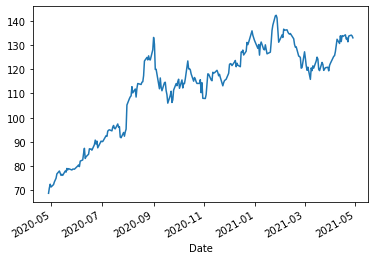

In [2]:
# Keep the last 5 days of data of Google dataset as test dataset.  The rest as train dataset
# Apple: April 28, 2020, and April 27, 2021

apple = yf.download('AAPL')
apple = apple.loc['2020-04-28': '2021-04-28']['Adj Close']
apple.plot()
display(apple)
train, test = apple[:-5], apple.tail(5)

In [3]:
# 2) Forecast the last 5 days using naïve forecasting methods and measure the MSE.  Which method is the best?

sample_size = len(apple)

index_vals = np.arange(len(train) + 1, sample_size + 1, 1)
df_pred = pd.DataFrame(test)
df_pred['pred_mean'] = np.mean(train)
df_pred['pred_last_value'] = train[len(train)-1]

# drift
delta_x = len(train) - 0
delta_y = train[-1] - train[0]
drift = delta_y / delta_x
df_pred['drift'] = index_vals * drift + train[0]     # y = a + b*x
display(df_pred)

,Adj Close,pred_mean,pred_last_value,drift
Date,,,,
2021-04-22,131.327560,112.154868,132.88031,133.138745
2021-04-23,133.696503,112.154868,132.88031,133.397180
2021-04-26,134.094650,112.154868,132.88031,133.655614
2021-04-27,133.766190,112.154868,132.88031,133.914049
2021-04-28,132.959946,112.154868,132.88031,134.172484


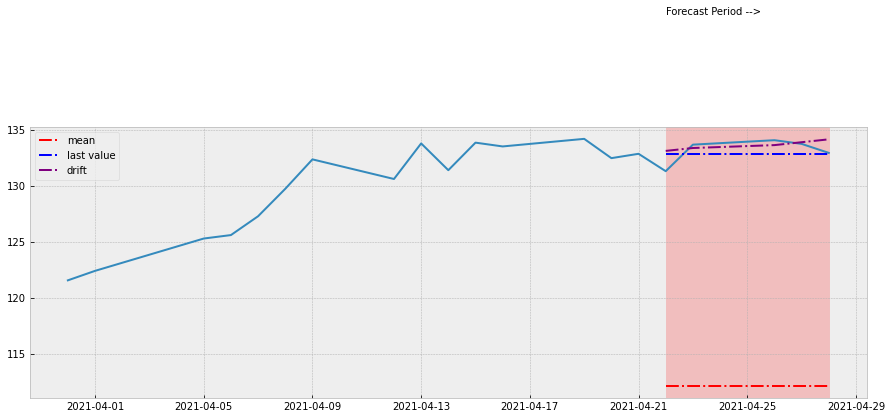

In [5]:
# 3) Plot your forecasts

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(apple.tail(20))
ax.axvspan(df_pred.iloc[0:1].index, df_pred.iloc[4:5].index, color='red', alpha=0.2)
ax.plot(df_pred['pred_mean'], color='red', ls='-.', label='mean')
ax.plot(df_pred['pred_last_value'], color='blue', ls='-.', label='last value')
ax.plot(df_pred['drift'], color='purple', ls='-.', label='drift')
ax.text(x=df_pred.iloc[0:1].index, y=max(np.max(train)+3, np.max(test)), s='Forecast Period -->')
plt.legend()
plt.show(); 

In [6]:
# measure MSE

from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(df_pred['Adj Close'], df_pred.pred_mean)
mse_last = mean_squared_error(df_pred['Adj Close'], df_pred.pred_last_value)
mse_drift = mean_squared_error(df_pred['Adj Close'], df_pred.drift)

results = pd.DataFrame({'Error': [mse_mean, mse_last, mse_drift]}, index=['mse mean', 'mse last value', 'mse drift'])
results

,Error
mse mean,442.577721
mse last value,1.068590
mse drift,1.010969


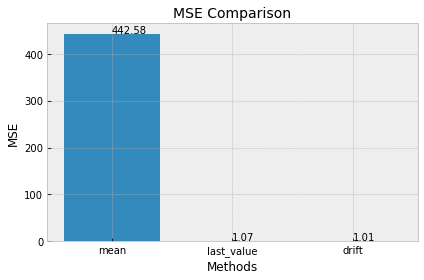

In [7]:
fig, ax = plt.subplots()

ax.bar(
    ['mean', 'last_value', 'drift'], 
    [mse_mean, mse_last, mse_drift], 
    width=0.8)

ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_title('MSE Comparison', fontsize=14)
ax.text(y=mse_mean+2, x=0, s=round(mse_mean, 2))
ax.text(y=mse_last+2, x=1, s=round(mse_last, 2))
ax.text(y=mse_drift+2, x=2, s=round(mse_drift, 2))

plt.tight_layout()

In [9]:
# 4) Forecast the next timestep over the test set and measure the MSE. Did it decrease?
df_pred_2 = pd.DataFrame(apple.copy())
df_pred_2.set_index(np.arange(0,len(apple)),inplace=True)
df_pred_2['one-step'] = df_pred_2['Adj Close'].shift(1)

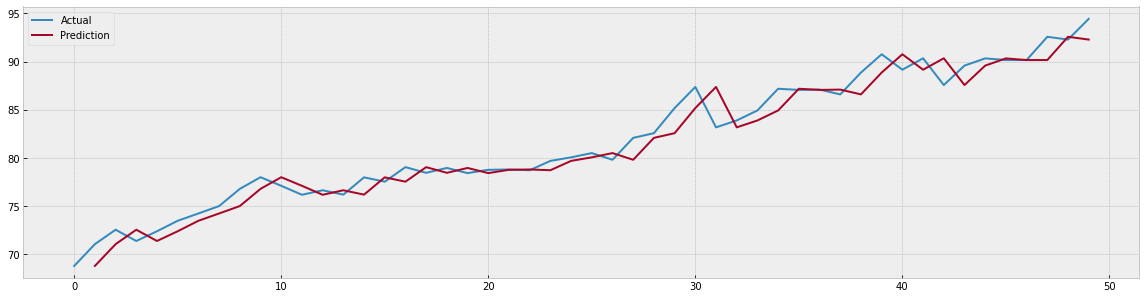

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.style.use('bmh')
ax.plot(df_pred_2['Adj Close'].head(50), label='Actual')
ax.plot(df_pred_2['one-step'].head(50), label='Prediction')
plt.legend()
plt.show(); plt.style.use('default')

In [11]:
mse_one_step = mean_squared_error(df_pred_2['Adj Close'].tail(5), 
    df_pred_2['one-step'].tail(5)) 
print(mse_one_step)

1.7878712011035531


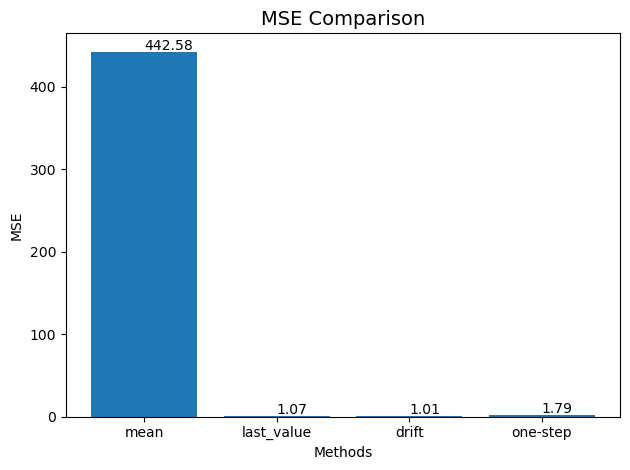

In [12]:
fig, ax = plt.subplots()

ax.bar(
    ['mean', 'last_value', 'drift', 'one-step'], 
    [mse_mean, mse_last, mse_drift, mse_one_step], 
    width=0.8)

ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_title('MSE Comparison', fontsize=14)
ax.text(y=mse_mean+2, x=0, s=round(mse_mean, 2))
ax.text(y=mse_last+2, x=1, s=round(mse_last, 2))
ax.text(y=mse_drift+2, x=2, s=round(mse_drift, 2))
ax.text(y=mse_one_step+2, x=3, s=round(mse_one_step, 2))

plt.tight_layout()